In [1]:
# !pip install pandas_datareader
# !pip install pandas
#pip install numpy
# !pip install matplotlib.pyplot
# pip install matplotlib
#!pip install sklearn.preprocessing
#!pip install --upgrade pip
#!pip install numpy
#!pip install tensorflow

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv('meezan.csv')
df = df.dropna()





In [3]:
minx=df['close'].min()
maxx=df['close'].max()
print("minimum in close price is ",minx)
print("maximum in close price is ",maxx)

minimum in close price is  4.22
maximum in close price is  155.0


In [4]:
df

,category,series-0- price,high,low,open,close
0,Thu Dec 06 2007,11.56,11.56,11.42,11.53,11.56
1,Fri Dec 07 2007,12.13,12.13,11.50,11.56,12.28
2,Mon Dec 10 2007,12.27,12.44,12.00,12.28,12.27
3,Tue Dec 11 2007,12.32,12.44,12.15,12.27,12.29
4,Wed Dec 12 2007,12.44,12.73,12.15,12.29,12.38
...,...,...,...,...,...,...
3361,Thu Nov 25 2021,148.00,148.95,146.50,147.00,147.75
3362,Fri Nov 26 2021,148.55,149.00,147.00,147.75,148.01
3363,Mon Nov 29 2021,150.50,158.90,147.10,148.01,151.00
3364,Tue Nov 30 2021,149.00,151.00,148.00,151.00,148.50


In [5]:
df1=df.reset_index()['close']
df1.shape

(3366,)

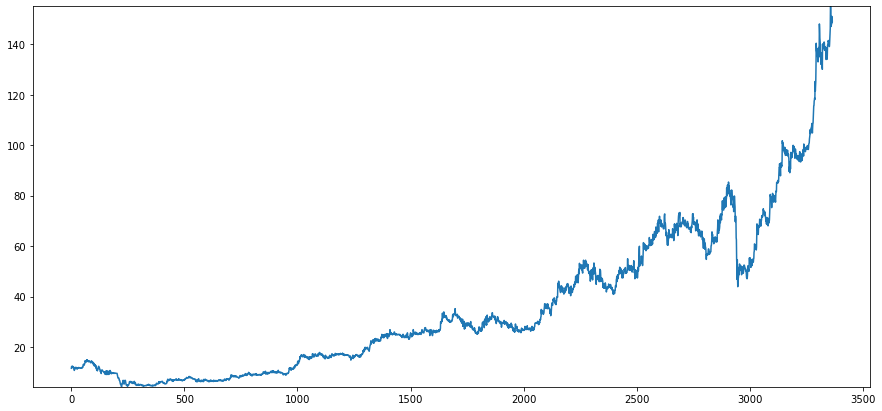

In [6]:
plt.figure(figsize=(15,7))

# df2=df.reset_index()['close']
# df2.shape

plt.plot(df1)
# plt.xticks(df.close[::5])
# plt.yticks(df.close[::5])
# plt.xlim(df.close.min(), df.close.max())
plt.ylim(df.close.min(), df.close.max())
plt.show()

In [7]:
df
df.drop(columns='series-0- price')

,category,high,low,open,close
0,Thu Dec 06 2007,11.56,11.42,11.53,11.56
1,Fri Dec 07 2007,12.13,11.50,11.56,12.28
2,Mon Dec 10 2007,12.44,12.00,12.28,12.27
3,Tue Dec 11 2007,12.44,12.15,12.27,12.29
4,Wed Dec 12 2007,12.73,12.15,12.29,12.38
...,...,...,...,...,...
3361,Thu Nov 25 2021,148.95,146.50,147.00,147.75
3362,Fri Nov 26 2021,149.00,147.00,147.75,148.01
3363,Mon Nov 29 2021,158.90,147.10,148.01,151.00
3364,Tue Nov 30 2021,151.00,148.00,151.00,148.50


In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1.shape
#jjprint(df1)

(3366, 1)

In [10]:
df1

array([[0.0486802 ],
       [0.05345537],
       [0.05338904],
       ...,
       [0.97347128],
       [0.95689083],
       [0.96020692]])

In [11]:
training_size=int(len(df1)*0.75)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [12]:
training_size,test_size

(2524, 842)

In [13]:
# len(train_data)
# len(test_data)
# training_size,test_size
import numpy as np
def create_dataset(dataset,time_step=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
        
    return np.array(dataX),np.array(dataY)

In [14]:
time_step=100
X_train,y_train=create_dataset(train_data,time_step)
X_test,ytest=create_dataset(test_data,time_step)
print(X_train.shape),print(y_train.shape)


(2423, 100)
(2423,)


(None, None)

In [15]:
print(X_test.shape),print(ytest.shape)

(741, 100)
(741,)


(None, None)

In [16]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)

X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [17]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense

from tensorflow.keras.layers import LSTM


In [18]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
#model.add(LSTM(50,return_sequences=True)) #extra layer
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
38/38 [==============================] - 10s 164ms/step - loss: 0.0020 - val_loss: 0.0061
Epoch 2/100
38/38 [==============================] - 5s 135ms/step - loss: 1.0829e-04 - val_loss: 0.0028
Epoch 3/100
38/38 [==============================] - 5s 136ms/step - loss: 7.8090e-05 - val_loss: 0.0026
Epoch 4/100
38/38 [==============================] - 5s 135ms/step - loss: 7.4772e-05 - val_loss: 0.0027
Epoch 5/100
38/38 [==============================] - 5s 136ms/step - loss: 7.2731e-05 - val_loss: 0.0026
Epoch 6/100
38/38 [==============================] - 5s 136ms/step - loss: 7.4975e-05 - val_loss: 0.0026
Epoch 7/100
38/38 [==============================] - 5s 136ms/step - loss: 7.4937e-05 - val_loss: 0.0028
Epoch 8/100
38/38 [==============================] - 5s 135ms/step - loss: 7.3983e-05 - val_loss: 0.0035
Epoch 9/100
38/38 [==============================] - 5s 136ms/step - loss: 1.0011e-04 - val_loss: 0.0019
Epoch 10/100
38/38 [==============================] - 5s 1

In [21]:
import tensorflow as tf


In [22]:
tf.__version__

'2.7.0'

In [23]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [24]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [25]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

26.654021260298826

In [26]:

meansquareerror=math.sqrt(mean_squared_error(ytest,test_predict))
meansquareerror

83.40110206011212

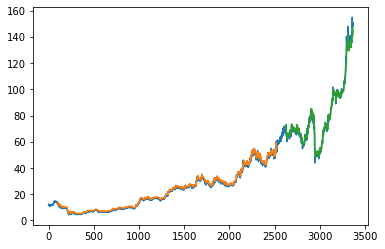

In [27]:
look_back=100  #timestep
trainPredictPlot=np.empty_like(df1)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict

testPredictPlot=np.empty_like(df1)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:]=test_predict
plt.plot(scaler.inverse_transform(df1))

plt.plot(trainPredictPlot,label="train data")
plt.plot(testPredictPlot,label="test data")
plt.show()

                                                       

In [28]:
len (test_data)

842

In [29]:
x_input=test_data[742:].reshape(1,-1)
x_input.shape



(1, 100)

In [30]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [31]:
len(temp_input)

100

In [32]:

from numpy import array
lst_output=[]
n_steps=100
i=0

while(i<30):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1,n_steps,1))
#         print(x_input)
        yhat=model.predict(x_input,verbose=0)
        print("{} day output".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape((1,n_steps,1))
        print(x_input.shape)
        yhat=model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
        
        
print( lst_output)

(1, 100, 1)
[0.9262432]
101
1 day input
1 day output
2 day input
2 day output
3 day input
3 day output
4 day input
4 day output
5 day input
5 day output
6 day input
6 day output
7 day input
7 day output
8 day input
8 day output
9 day input
9 day output
10 day input
10 day output
11 day input
11 day output
12 day input
12 day output
13 day input
13 day output
14 day input
14 day output
15 day input
15 day output
16 day input
16 day output
17 day input
17 day output
18 day input
18 day output
19 day input
19 day output
20 day input
20 day output
21 day input
21 day output
22 day input
22 day output
23 day input
23 day output
24 day input
24 day output
25 day input
25 day output
26 day input
26 day output
27 day input
27 day output
28 day input
28 day output
29 day input
29 day output
[[0.9262431859970093], [0.9042802453041077], [0.8854575157165527], [0.8726003170013428], [0.8646812438964844], [0.8598745465278625], [0.856315553188324], [0.8525888919830322], [0.8479260802268982], [0.842163

In [33]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)


In [34]:
import matplotlib.pyplot as plt

In [35]:
len(df1)

3366

In [36]:
df3=df1.tolist()
df3.extend(lst_output)

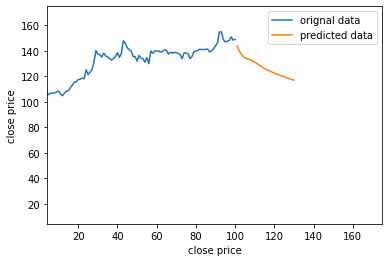

In [37]:
plt.plot(day_new,scaler.inverse_transform(df1[3266:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.legend(["blue", "green"])
plt.xlabel('close price')
plt.ylabel('close price')

plt.xlim(df.close.min(), df.close.max()+20)
plt.ylim(df.close.min(), df.close.max()+20)

plt.legend(["orignal data", "predicted data"])
plt.show()


In [38]:
rmse=np.sqrt(meansquareerror)
print("Root mean square error : ",rmse)

Root mean square error :  9.132420383453235


In [63]:
actual=[]
actual=df.close[3336:].tolist()
predicted=scaler.inverse_transform(lst_output)
predPrice=predicted.ravel()
print("Predicted : ",predPrice,' \n\n\n Actual  :',actual)

Predicted :  [143.87894758 140.56737539 137.72928422 135.7906758  134.59663795
 133.87188413 133.33525911 132.77335313 132.07029438 131.20147592
 130.20572241 129.1511208  128.10557827 127.11865018 126.21500637
 125.3969116  124.65154116 123.95941981 123.30135092 122.6628022
 122.03536165 121.41639601 120.8071635  120.21087254 119.63092928
 119.06982316 118.52854278 118.00689042 117.50362585 117.01701454]  


 Actual  : [138.1, 137.01, 133.9, 138.5, 138.45, 137.85, 134.02, 135.5, 139.5, 139.9, 140.3, 141.4, 141.01, 141.2, 141.11, 141.5, 139.03, 139.99, 141.65, 144.0, 146.15, 154.88, 155.0, 149.0, 147.0, 147.75, 148.01, 151.0, 148.5, 149.0]


In [65]:
# plt.plot(actual)
# plt.plot(predPrice)
# plt.title("Prediction For Next 30 Days")
# plt.legend(["actual data", "predicted data"]) 
# plt.plot()